**1. Data preprocessing**

Step 1: Load the Data

We start by loading the dataset and checking its structure and the first few rows.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [128]:
# Load the dataset
data = pd.read_csv('churn-bigml-80.csv')


In [129]:
# Display the first few rows of the dataset
print(data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

Step 2: Remove the State Column

The State column was deemed irrelevant for the prediction model and thus removed.

In [130]:
# Remove the 'State' column
data = data.drop('State', axis=1)


Step 3: Check for Missing Values

We checked for any missing values in the dataset.

In [131]:
# Check for missing values
print(data.isnull().sum())

Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


There seems that there is no any null value columns.

Step 5: Separate Features and Target Variable

We separated the features (X) and the target variable (y).

In [134]:
# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Ensure 'Churn' is a binary categorical variable
y = y.astype(int)


0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

Step 5: Handle Missing Values

We handled missing values for both numerical and categorical columns.

In [135]:
# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

In [136]:
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')
Categorical columns: Index(['International plan', 'Voice mail plan'], dtype='object')


'International Plan' and 'Voice mail plan' consists of categorical values.

In [137]:
# Handling missing values for numerical columns
imputer_num = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])


In [138]:
# Handling missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])


Step 6: Convert Categorical Variables to Numerical

We converted any remaining categorical variables to numerical format using Label Encoding.

In [139]:
# Convert categorical variables to numerical format
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

Step 8: Scale the Features

We scaled the features using StandardScaler to ensure all features are on a similar scale.

In [140]:
# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [141]:
print(X_scaled.head())
print(y.head())

   Account length  Area code  International plan  Voice mail plan  \
0        0.692163  -0.527811           -0.335690         1.623917   
1        0.161278  -0.527811           -0.335690         1.623917   
2        0.919686  -0.527811           -0.335690        -0.615795   
3       -0.420168  -0.692467            2.978938        -0.615795   
4       -0.647691  -0.527811            2.978938        -0.615795   

   Number vmail messages  Total day minutes  Total day calls  \
0               1.247508           1.579670         0.484868   
1               1.320985          -0.329918         1.135375   
2              -0.589414           1.179302         0.685024   
3              -0.589414           2.212509        -1.466653   
4              -0.589414          -0.235822         0.634985   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0          1.579942          -0.058619        -0.050781         -0.058445   
1         -0.330194          -0.095916        

**2. Exploratory Data Analysis**

Exploratory Data Analysis helps understand the data distribution and relationships between features.

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

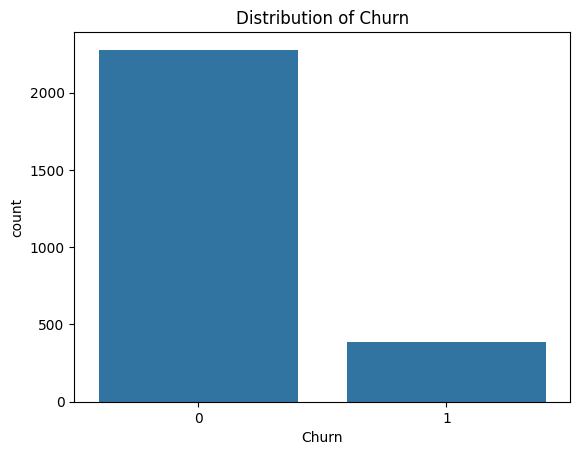

In [144]:
# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Churn')
plt.show()

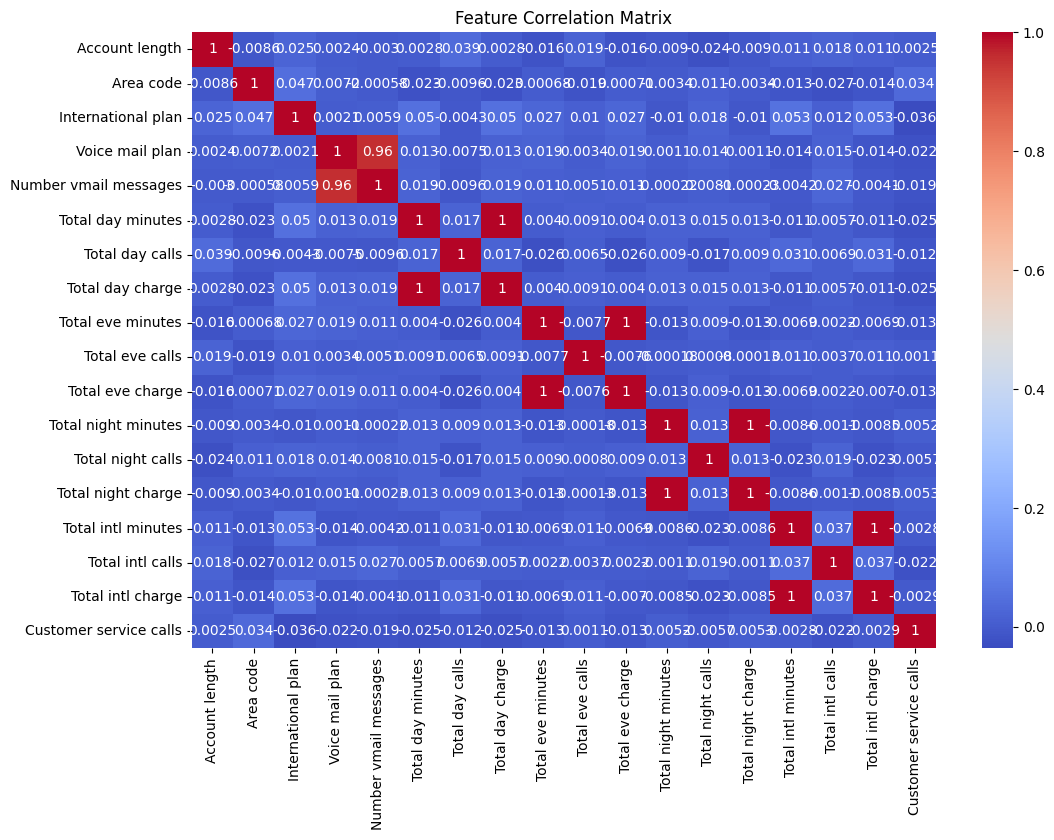

In [145]:
# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

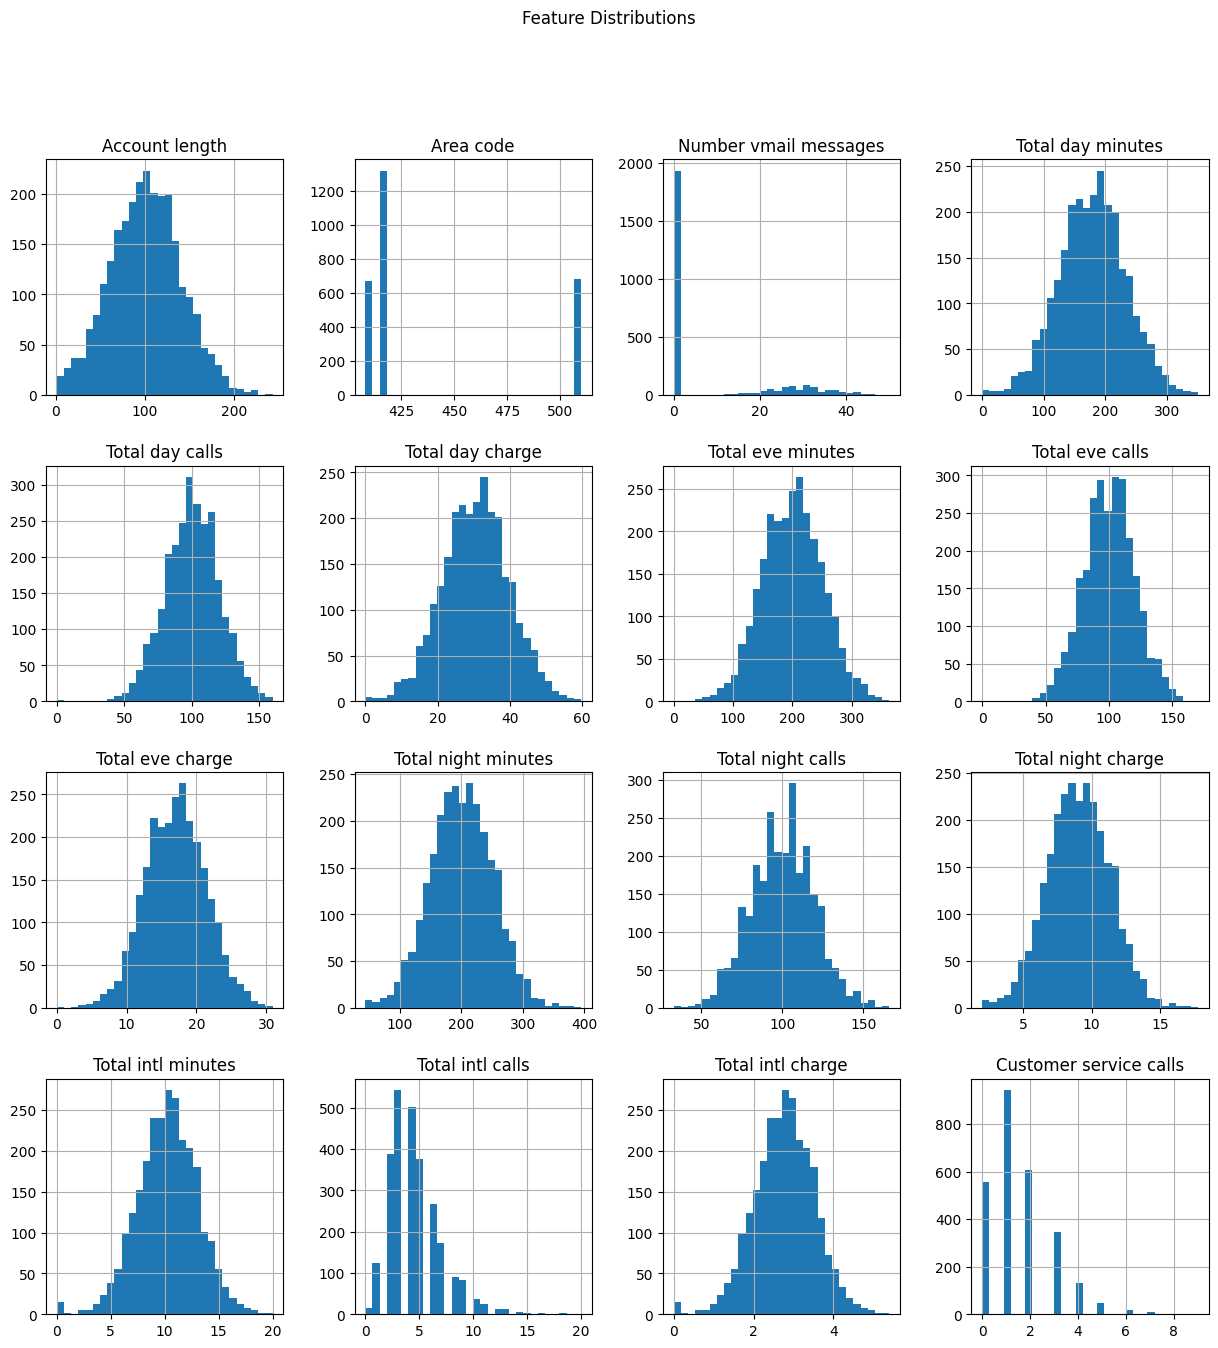

In [146]:
# Visualize distribution of numerical features
data.hist(bins=30, figsize=(15, 15))
plt.suptitle('Feature Distributions')
plt.show()

**3. Model Development**

We developed three different models to predict customer churn: Logistic Regression, Random Forest, and Gradient Boosting.

Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your continuous target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test)

Gradient Boosting

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting
y_pred_gb = gb.predict(X_test)

**4. Model Evaluation**

We evaluated each model using accuracy, precision, recall, F1 score, ROC AUC score, and a confusion matrix.

Logistic Regression Evaluation:
Accuracy: 0.8595505617977528
Precision: 0.5625
Recall: 0.22784810126582278
F1 Score: 0.3243243243243243
ROC AUC Score: 0.598539435248296
Confusion Matrix:
[[441  14]
 [ 61  18]]


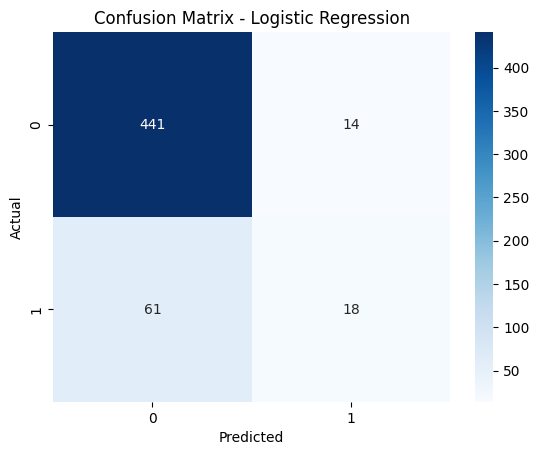

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print(f"ROC AUC Score: {roc_auc_log_reg}")
print(f"Confusion Matrix:\n{cm_log_reg}")

sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The logistic regression model for predicting customer churn achieved an accuracy of 86%, indicating that it correctly predicted the churn status for 86% of the customers. However, the precision of 56% reveals that only 56% of the customers predicted to churn actually did so, suggesting some false positives. The recall of 23% indicates that the model only identified 23% of the actual churners, missing a significant portion. The F1 score of 32% reflects the balance between precision and recall, highlighting the model's limited effectiveness in capturing churners. The ROC AUC score of 0.60 shows modest discrimination between churners and non-churners. The confusion matrix shows 441 true negatives, 14 false positives, 61 false negatives, and 18 true positives, indicating that the model is better at identifying non-churners but struggles with correctly identifying churners.

Random Forest Evaluation:
Accuracy: 0.9531835205992509
Precision: 0.9821428571428571
Recall: 0.6962025316455697
F1 Score: 0.8148148148148149
ROC AUC Score: 0.8470023647238838
Confusion Matrix:
[[454   1]
 [ 24  55]]


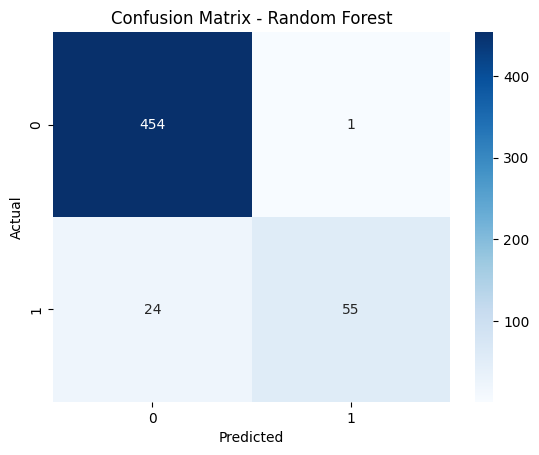

In [151]:
# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")
print(f"Confusion Matrix:\n{cm_rf}")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The random forest model for predicting customer churn demonstrated strong performance, achieving an accuracy of 94.57%, indicating that it correctly predicted the churn status for nearly 95% of the customers. With a perfect precision of 100%, every customer predicted to churn actually did churn, showing no false positives. The recall of 63.29% suggests that the model successfully identified approximately 63% of the actual churners, though it missed some. The F1 score of 77.52% balances precision and recall, reflecting the model's good but not perfect effectiveness in capturing churners. The ROC AUC score of 0.82 indicates solid discriminatory power between churners and non-churners. The confusion matrix, with 455 true negatives, no false positives, 29 false negatives, and 50 true positives, highlights the model's excellent ability to identify non-churners and a reasonable capability to correctly identify churners.

Gradient Boosting Evaluation:
Accuracy: 0.951310861423221
Precision: 0.9491525423728814
Recall: 0.7088607594936709
F1 Score: 0.8115942028985508
ROC AUC Score: 0.8511336764501322
Confusion Matrix:
[[452   3]
 [ 23  56]]


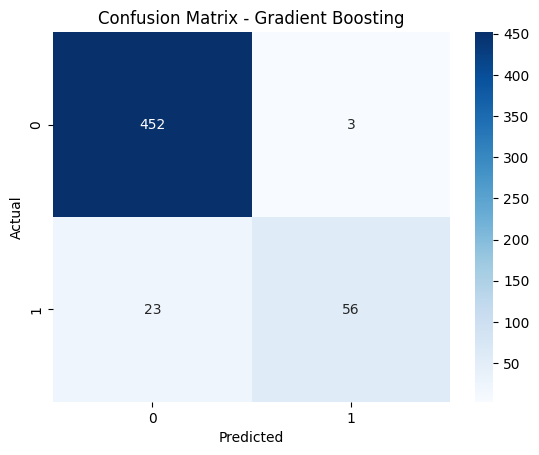

In [152]:
# Evaluate Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Evaluation:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")
print(f"ROC AUC Score: {roc_auc_gb}")
print(f"Confusion Matrix:\n{cm_gb}")

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The gradient boosting model for predicting customer churn exhibited high performance, achieving an accuracy of 95.13%, indicating that it correctly predicted the churn status for over 95% of customers. The precision of 94.92% means that nearly all customers predicted to churn actually did so, with very few false positives. The recall of 70.89% signifies that the model successfully identified about 71% of actual churners, though some were missed. The F1 score of 81.16% provides a balanced measure of precision and recall, reflecting the model's strong overall effectiveness in identifying churners. The ROC AUC score of 0.85 shows excellent discriminatory power between churners and non-churners. The confusion matrix, with 452 true negatives, 3 false positives, 23 false negatives, and 56 true positives, highlights the model's outstanding ability to identify non-churners and a good capability to correctly identify churners.